# Figure 3

In [1]:
%pylab inline 
from numpy import *

import sys
sys.path.append('../utils')
from eigenvalues import *
from plot import *

Populating the interactive namespace from numpy and matplotlib


## Figure 3(A) (B): robust optimum requires that neither layer dominates.

In [2]:
def make_fig_3AB():
    deltas = linspace(-1,1,50)#50
    chis = linspace(0.,1,31)#17
    omegas = logspace(1,3,5)#9
    plot_chis = arange(len(chis))[::6]
    G = get_network_properties('HumanAINetwork')

    fig,ax = subplots(2,1,figsize=(4,5.5),constrained_layout=True)
    
    plot_lambda2_vs_delta_chis(G,deltas,chis,plot_chis,ax[0])
    chi_star = plot_dlambda2_ddelta(G,omegas,deltas,chis,ax[1])

    ax[0].set_ylabel('convergence rate, $Re(\overline{\lambda}_2)$')
    ax[0].legend(['$\chi = ' + str(chis[s])[:4] + '$' for s in plot_chis],
                 bbox_to_anchor=(1, 1.05))
    ax[1].set_ylabel('${\overline{\lambda}}_2^{\prime}$')
    ax[1].legend(['$\omega = '+str(int(w))+'$' for w in omegas],bbox_to_anchor=(1, 1.05))
#     ax[1].set_xlim(.05,.85)

#     ax[0].text(-2., 1.6, '(A)',fontsize=14)
#     ax[1].text(-.5, 1.6, '(B)',fontsize=14)
    
    print(chi_star)

(0.06666666666666667, 0.7)


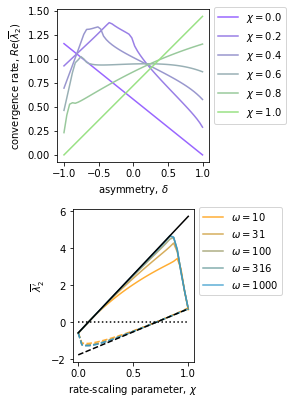

In [3]:
make_fig_3AB()

# savefig('figs/figure3AB.pdf',bbox_inches='tight')

In [4]:
def make_fig_3AB():
    deltas = linspace(-1,1,50)#50
    chis = linspace(0.05,.85,31)#17
    omegas = logspace(1,3,5)#9
    plot_chis = arange(len(chis))[::6]
    G = get_network_properties('HumanAINetwork')

    fig,ax = subplots(2,1,figsize=(4,5.3),constrained_layout=True)
    
    plot_lambda2_vs_delta_chis(G,deltas,chis,plot_chis,ax[0])
    chi_star = plot_dlambda2_ddelta(G,omegas,deltas,chis,ax[1])

    ax[0].set_ylabel('convergence rate, $Re(\overline{\lambda}_2)$')
    ax[0].legend(['$\chi = ' + str(chis[s])[:4] + '$' for s in plot_chis],
                 bbox_to_anchor=(1, 1.05))
    ax[1].set_ylabel('$\overline{\lambda}_2^{\prime}$')
    ax[1].legend(['$\omega = '+str(int(w))+'$' for w in omegas],bbox_to_anchor=(1, 1.05))

#     ax[0].text(-2., 1.6, '(A)',fontsize=14)
#     ax[1].text(-.5, 1.6, '(B)',fontsize=14)
    
    print(chi_star)

(0.07666666666666666, 0.69)


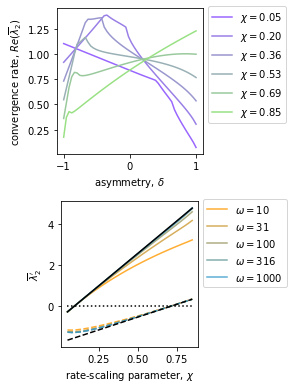

In [5]:
make_fig_3AB()

savefig('figs/figure3AB.pdf',bbox_inches='tight')

## Figure 3(C): depiction of Re($\lambda_2$) for the ($\delta, \chi$) parameter space.

In [6]:
def make_fig_3C():
    G = get_network_properties('HumanAINetwork')
    omegas = logspace(1,3,9) # a bunch of coupling strengths
    deltas = linspace(-1,1,200) # a bunch of asymmetry parameter
    chis = linspace(0.01,.99,160) # a bunch of rate-scaling parameter
    
    optima_delta = get_optima(G,omegas,deltas,chis)
    
    fig,ax = subplots(1,1,figsize=(4,3.5),constrained_layout=True)
    
    im = plot_contour(G,deltas,chis,ax)
    ax.plot(chis,optima_delta,'--w',linewidth=2)
    ax.plot([0,1],[0,0],':k')


    cbar = fig.colorbar(im, ax=ax, shrink=.5,location='bottom')
    cbar.set_label('convergence rate, $Re(\overline{{\lambda}}_2)$', rotation=0,labelpad=15)

    ax.set_ylabel('asymmetry, $\delta$')
#     ax.text(-.4, 1., '(C)',fontsize=14)
    return fig,ax

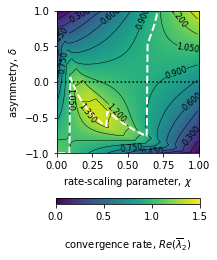

In [7]:
make_fig_3C()

savefig('figs/figure3C.pdf',bbox_inches='tight')

## Figure 3(D): the convergence rate of individual layers

In [8]:
def make_fig_3D():
    G = get_network_properties('HumanAINetwork')
    chis = linspace(0.01,.99,60)
    
    fig,ax = subplots(1,1,figsize=(3,1.2))

    plot_Leval2_eachlayer(G,chis,ax)

    ax.set_ylabel('convergence rate')
#    ax.set_ylabel('$Re({{\lambda}}_2 )$')
    plt.legend(
        ['layer 1: $\lambda_2^{(1)}$',
                'layer 2: $\lambda_2^{(2)}$'],
#         ['layer 1: $\chi Re(\lambda_2^{(1)})$',
#                 'layer 2: $(1-\chi)Re(\lambda_2^{(2)})$'],
                   loc = 'lower center',
                   ncol = 2,
#                    bbox_to_anchor=(.5, -1.5)
                   bbox_to_anchor=(.5, -1)
                  )
#     ax.text(-.4, 1.5, '(D)',fontsize=14)
    return fig,ax

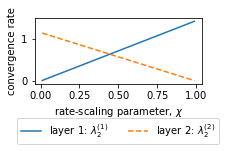

In [9]:
make_fig_3D()
savefig('figs/figure3D.pdf',bbox_inches='tight')